#### matplotlib & seaborn

In [1]:
import numpy as np
import pandas as pd
%precision 3
import matplotlib.pyplot as plt
%matplotlib inline

#### pyplot을 이용한 꺾은선 그래프

In [6]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([2,3,4,3,5,4,6,7,4,8])

Text(0, 0.5, 'y')

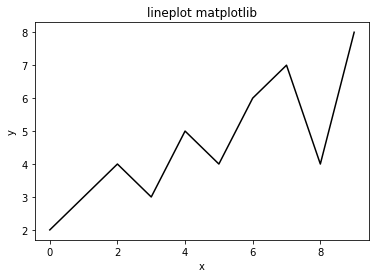

In [7]:
plt.plot(x,y,color='black') # 그래프를 그리는 함수 plt.plot
plt.title('lineplot matplotlib')
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
# 그래프 저장
# plt.savefig('파일명')

#### seaborn과 pyplot을 이용한 꺾은선 그래프

In [8]:
import seaborn as sns
sns.set() # 그래프 디자인 변경

Text(0, 0.5, 'y')

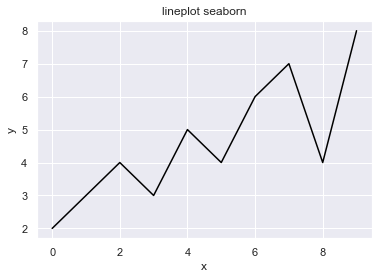

In [9]:
plt.plot(x,y,color='black')
plt.title('lineplot seaborn')
plt.xlabel('x')
plt.ylabel('y')

In [10]:
# seaborn 히스토그램

fish_data = np.array([2,3,3,4,4,4,4,5,5,6])
fish_data

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

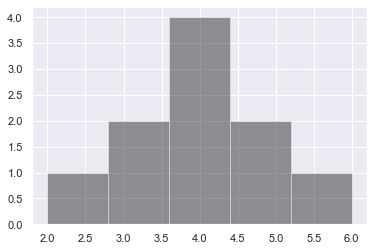

In [15]:
sns.distplot(fish_data, bins=5, color='black', kde=False)
# bins => 나눌 구간수
# kde => 커널밀도추정 여부

#### 커널밀도추정에 따른 히스토그램 평활화

In [16]:
# 커널밀도추정은 히스토그램이 가진 문제를 해소하기 위한 방법.
# 히스토그램의 문제는 구간을 어떻게 정하느냐에 따라 모양이 크게 바뀜
# ex) bins=1로 지정하여 히스토그램을 그리면 데이터의 특징이 전혀 드러나지 않게됨

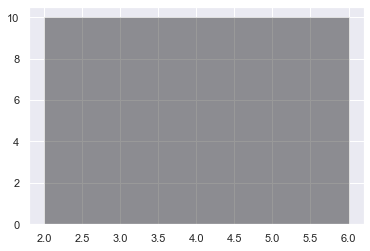

In [17]:
sns.distplot(fish_data, bins=1, color='black', kde=False)

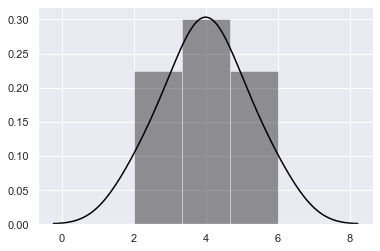

In [19]:
# 커널밀도 추정을 통하여 히스토그램을 평활화 
# 히스토그램의 면적 합계가 1이 되도록 세로축 변경, 확률과 해석 용이 위해

sns.distplot(fish_data, color='black')
# bins와 kde=False 없에면 됨

#### 2변량 데이터에 대한 히스토그램

In [20]:
fish_multi = pd.read_csv('C:/Users/KIHyuk/Desktop/파이썬으로 배우는 통계학 교과서 예제소스/3-3-2-fish_multi_2.csv')

In [21]:
fish_multi

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4
5,A,4
6,A,4
7,A,5
8,A,5
9,A,6


In [23]:
# 통계량 계산
fish_multi.groupby('species').describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

In [24]:
# 종류별 몸길이 데이터
length_a = fish_multi.query("species == 'A'")['length']
length_b = fish_multi.query("species == 'B'")['length']

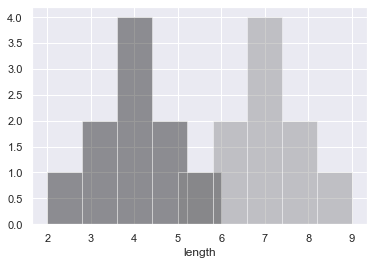

In [25]:
sns.distplot(length_a, bins=5, color='black', kde=False)
sns.distplot(length_b, bins=5, color='gray', kde=False)

#### 다변량 데이터 시각화

In [27]:
#sns.함수명(
#    x='x축의 열 이름',
#    y='y축의 열 이름',
#    data= 데이터프레임,
#    그 외 인수
#)

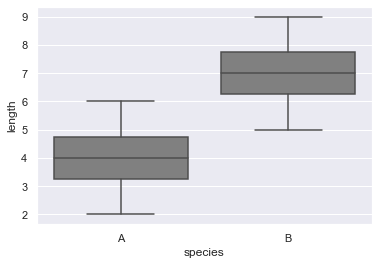

In [28]:
# boxplot
# 카테고리 변수와 수치형 변수 조합

sns.boxplot(x='species', y='length', data=fish_multi, color='gray')

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


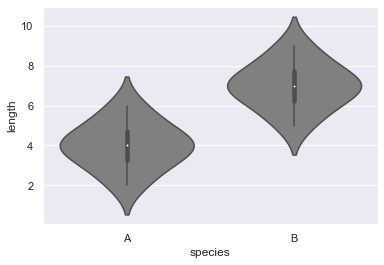

In [29]:
# 바이올린플롯
# 상자그림의 상자 대신 커널밀도추정의 결과 사용
# 데이터 분포를 자세히 볼 수 있음

sns.violinplot(x='species', y='length', data=fish_multi, color='gray')

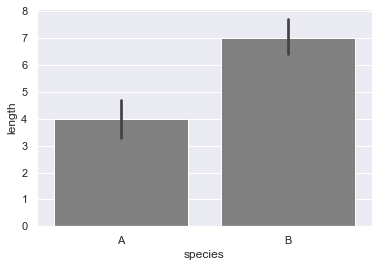

In [31]:
# barplot
# 막대의 높이는 "평균"을 나타냄
# 검은선은 신뢰구간

sns.barplot(x='species', y='length', data=fish_multi, color='gray')

In [33]:
# 산포도
# 수치형 변수와 수치형 변수

cov_data = pd.read_csv('C:/Users/KIHyuk/Desktop/파이썬으로 배우는 통계학 교과서 예제소스/3-2-3-cov.csv')

In [34]:
cov_data

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


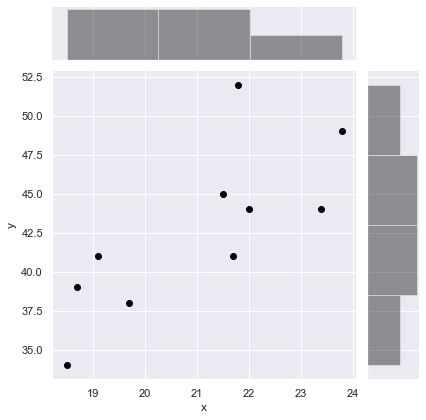

In [35]:
sns.jointplot(x='x', y='y', data=cov_data, color='black')

In [37]:
# 페어플롯
# 많은 양의 변수를 가지고 있는 데이터를 대상으로 그래프를 그릴경우

iris = sns.load_dataset('iris')
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [40]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


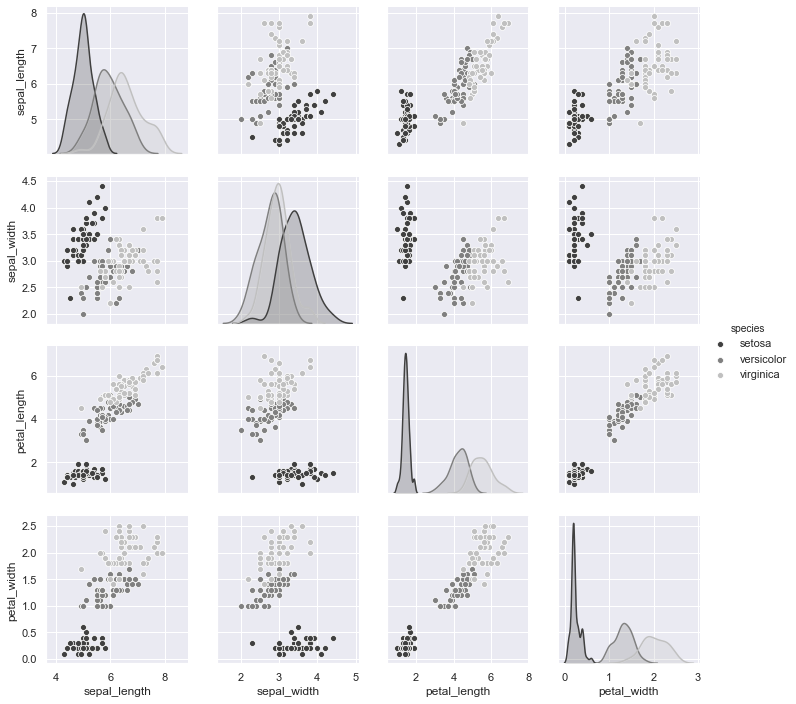

In [41]:
sns.pairplot(iris, hue='species', palette='gray')
# pairplot 함수는 데이터프레임만 넘겼을 경우 산포드를 그리지만, 
# hue="카테고리 변수의 열 이름"을 인수로 넘기면 카테고리별로 색을 나누어 그래프 그려줌